In [1]:
from IPython.display import display, HTML
import re
import json

def show_result(loaded_json):
    for y in loaded_json:
        #y = json.loads(y)
        if y['find_success'] == False:
            print('====dont know that word TT')
            continue

        for filename in y['memes']:
            decoded = y['memes'][filename].replace("'", '"')
            decoded = re.search(r'\"(.*)\"', decoded).group(1)
            display(HTML('''<img src="data:image/jpg;base64,''' + decoded + '''">'''))    
            print(y['episodes'][filename])                
            print(y['texts'][filename])
            if y['sims']:
                print(y['sims'][filename])
        print("--- done ---")

In [3]:
import client
mc = client.MgClient()

==random==



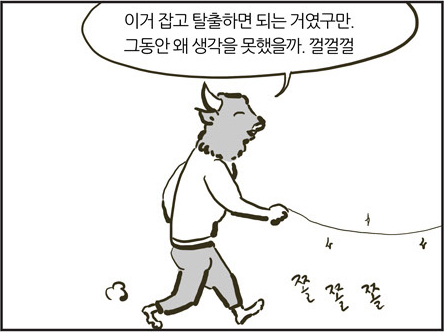

73화_풍운아_미노타우로스_-1-
이거 잡고 탈출하면 되는 거였구만 그동안 왜 생각을 못했을까 껄껄껄 
--- done ---
==query==



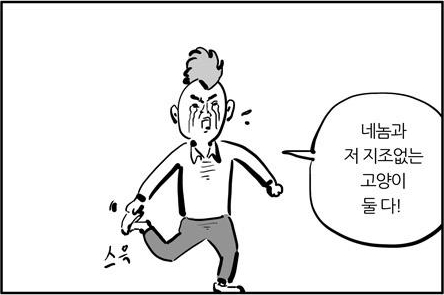

62화_고양이이야기_-上-
네놈과 저 지조없는 고양이 둘 다 
0.4076361358165741



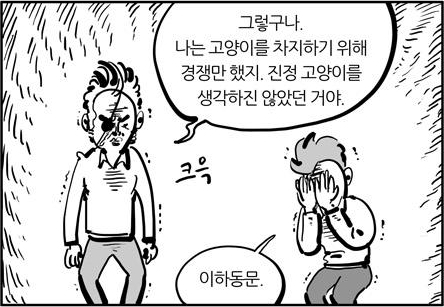

64화_고양이이야기_-下-
그렇구나 나는고양이를 차지하기 위해 경쟁만 했지 진정 고양이를 생각하진 않았던 거야 이하동문 
0.25022217631340027



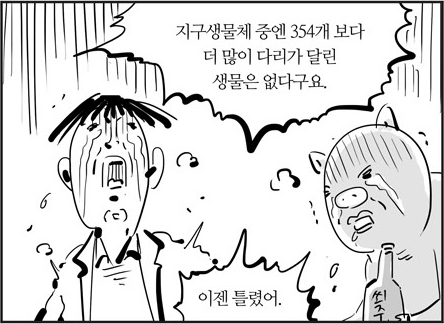

105화_돼지는_족발순이_아니잖아요_上
지구생물체 중엔 개 보다 더 많이 다리가 달린 생물은 없다구요 이젠 틀렸어 쐬 
0.1632906049489975
--- done ---


In [4]:
print('==random==')
show_result(mc.random())
print('==query==')
query = '고양이'
show_result(mc.dank([query], 3, 0.15))